In [1]:
# Import required packages

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Load datasets

path = r'datasets/khaby_lame_profile_data.csv'
df = pd.read_csv(path, low_memory=False)


In [3]:
# Check a sample of the dataset

df.sample(10)


,views,comments,shares,likes,duration,captions,hashtags,created_at
301,"35,100,000",43,4٫431,"2,700,000",5,#foryoupage #comic,"foryoupage, comic",4/10/2021
286,"37,300,000",22٫2,37٫8,"3,600,000",28,Why?!😭😭#LearnWithTikTok #LearnFromKhabi #Impar...,"learnwithtiktok, learnfromkhabi, imparacontiktok",4/28/2021
911,195٫9,127,964,30٫4,8,#greenscreen #foryoupage #foryou,"greenscreen, foryoupage, foryou",6/15/2020
57,"38,300,000",23٫6,7٫881,"3,300,000",31,Rule n.1 NEVER PISS OFF YOUR MOM! R.I.P. Khaby...,"mum, dontlearnfromkhaby",1/19/2023
206,"44,600,000",38٫3,30,"5,800,000",33,🤦🏿#learnfromkhaby #learnwithtiktok #imparacont...,"learnfromkhaby, learnwithtiktok, imparacontiktok",9/21/2021
841,409٫5,101,151,60٫9,14,NaN,NaN,7/12/2020
901,141٫3,128,867,22,9,#foryoupage #foryou #viral #duetto,"foryoupage, foryou, viral, duetto",6/18/2020
1057,350٫6,138,521,37٫3,15,#comedy #coronavirus #scuola#pandemia,"comedy, coronavirus, scuola, pandemia",3/30/2020
943,822٫8,2٫717,1٫778,101٫9,12,Commentate con ( no al razzismo) se vi va #gre...,"greenscreen, foryoupage, foryou, america, geor...",6/3/2020
824,142٫6,442,342,20٫5,10,La persona dopo la @ è tuo padre #foryoupage #...,"foryoupage, foryou, comic, ironia",7/20/2020


In [4]:
# Check the number of rows and columns (rows, columns)
df.shape


(1078, 8)

In [5]:
# Get a concise summary information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   views       1078 non-null   object
 1   comments    1078 non-null   object
 2   shares      1078 non-null   object
 3   likes       1078 non-null   object
 4   duration    1078 non-null   int64 
 5   captions    972 non-null    object
 6   hashtags    953 non-null    object
 7   created_at  1078 non-null   object
dtypes: int64(1), object(7)
memory usage: 67.5+ KB


In [6]:
# Check the dataset data types
df.dtypes


views         object
comments      object
shares        object
likes         object
duration       int64
captions      object
hashtags      object
created_at    object
dtype: object

In [7]:
# Check if there are null values in the dataset
df.isnull().sum()


views           0
comments        0
shares          0
likes           0
duration        0
captions      106
hashtags      125
created_at      0
dtype: int64

In [8]:
# Change the `created_at` data type to datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%Y')


In [9]:
# Extract the day, month and year

df['created_day'] = df['created_at'].dt.strftime('%A')
df['created_month'] = df['created_at'].dt.strftime('%B')
df['created_year'] = df['created_at'].dt.strftime('%Y')


In [10]:
# Cleaning views

df['views'] = df["views"].str.replace('٫', '')
df['views'] = df["views"].str.replace(',', '')


In [11]:
df['views'] = df['views'].astype(int)


In [12]:
df['comments'].value_counts()


comments
138      9
127      8
73       7
74       7
85       6
        ..
258٫8    1
77٫8     1
9٫558    1
26       1
89٫6     1
Name: count, Length: 713, dtype: int64

In [13]:
df['comments'].unique()

array(['5٫006', '7٫425', '5٫734', '6٫839', '11٫4', '6٫393', '5٫527',
       '13٫5', '7٫843', '74', '10٫4', '43٫3', '6٫195', '37٫9', '17٫3',
       '15', '5٫05', '9٫927', '11٫2', '29٫3', '8٫951', '12٫1', '14٫3',
       '4٫823', '15٫5', '16٫7', '89٫5', '15٫2', '63', '9٫48', '2٫403',
       '16٫2', '11٫9', '16٫6', '9٫713', '16٫9', '17٫7', '14٫1', '12٫3',
       '3٫792', '13٫2', '12', '43٫9', '18٫7', '13٫6', '4٫666', '7٫471',
       '10٫5', '4٫704', '23', '20٫7', '8٫739', '5٫712', '22٫4', '23٫6',
       '24٫4', '9٫845', '22٫9', '27٫6', '89٫8', '14٫4', '21٫9', '22٫1',
       '38٫3', '86٫9', '43٫4', '26٫4', '5٫365', '7٫787', '7٫811', '7٫874',
       '36٫8', '15٫7', '33٫9', '23٫4', '16٫5', '15٫8', '9٫04', '71٫2',
       '21٫1', '16', '25٫5', '54٫4', '14', '26٫8', '28٫2', '53٫6', '14٫2',
       '25٫4', '24٫6', '8٫773', '31٫4', '38٫7', '23٫5', '35٫1', '127',
       '84٫5', '53٫4', '28٫5', '19', '27٫7', '112٫7', '12٫9', '41٫7',
       '21٫7', '40٫8', '27٫1', '52', '45٫9', '14٫7', '24٫9', '14٫9',

In [14]:
# Check the number of unique values of comments

df['comments'].nunique()


713

In [15]:
# Cleaning comments

df['comments'] = df["comments"].str.replace('٫', '')

In [16]:
df['comments'] = df.comments.astype(int)

In [17]:
df['shares'].value_counts()


shares
195      5
154      5
417      4
223      4
13٫9     4
        ..
102٫7    1
552      1
1٫54     1
1٫188    1
13٫4     1
Name: count, Length: 882, dtype: int64

In [18]:
df['shares'].unique()

array(['1٫164', '1٫674', '1٫756', '1٫154', '4٫515', '2٫11', '1٫394',
       '2٫869', '1٫788', '59', '3٫97', '19٫5', '3٫782', '37', '6٫53',
       '3٫3', '1٫492', '3٫934', '6٫041', '15٫8', '2٫125', '4٫373', '4٫59',
       '1', '4٫191', '4٫361', '47٫7', '6٫905', '27', '2٫344', '1٫623',
       '4٫002', '4٫767', '5٫583', '8٫909', '3٫414', '3٫142', '10',
       '2٫409', '1٫215', '1٫73', '697', '9٫769', '3٫262', '38٫9', '12٫5',
       '1٫142', '1٫092', '2٫063', '2٫941', '1٫209', '6٫84', '8٫456',
       '1٫327', '928', '6٫099', '4٫001', '7٫881', '2٫709', '2٫645',
       '3٫396', '2٫874', '10٫5', '37٫6', '2٫99', '4٫874', '1٫377', '38٫6',
       '29٫1', '7٫863', '1٫74', '2٫094', '2٫75', '7٫152', '32', '9٫963',
       '3٫834', '17', '17٫1', '12٫1', '5٫424', '10٫2', '6٫897', '43٫4',
       '31٫8', '9٫871', '15٫5', '30٫8', '10٫4', '23', '22٫1', '88٫9',
       '7٫297', '9٫687', '44٫9', '25٫8', '3٫54', '5٫309', '44٫5', '9٫228',
       '6٫236', '5٫872', '10٫6', '16٫8', '49٫4', '90٫5', '32٫5', '17٫6',

In [19]:
df['shares'].nunique()

882

In [20]:
df['shares'] = df['shares'].str.replace('٫', '')
df['shares'] = df['shares'].str.replace(',', '')

In [21]:
df['shares'] = df['shares'].astype(int)

In [22]:
df['likes'] = df['likes'].str.replace('٫', '')
df['likes'] = df['likes'].str.replace(',', '')

In [23]:
df['likes'] = df['likes'].astype(int)

In [24]:
# Fill the missing values in the `captions` column

most_frequent_caption = df['captions'].mode()[0]

In [25]:
df['captions'].fillna(most_frequent_caption, inplace=True)

In [26]:
# Fill the missing values in the `hashtags` column
most_frequent_hashtag = df['hashtags'].mode()[0]

In [27]:
df['hashtags'].fillna(most_frequent_hashtag, inplace=True)

In [28]:
# Check the duplicated rows

df.duplicated().sum()

0

In [29]:
df.dtypes

views                     int64
comments                  int64
shares                    int64
likes                     int64
duration                  int64
captions                 object
hashtags                 object
created_at       datetime64[ns]
created_day              object
created_month            object
created_year             object
dtype: object

In [30]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
views,1078.0,16572104.24397,114.0,2199.0,4994.0,14500000.0,352900000.0,39151286.199829
comments,1078.0,694.375696,0.0,128.25,244.0,530.75,9996.0,1452.730057
shares,1078.0,4071.967532,1.0,191.0,442.0,1206.5,3100000.0,94399.208439
likes,1078.0,1732037.397032,13.0,304.25,683.5,1300000.0,37900000.0,4395829.518566
duration,1078.0,16.753247,4.0,9.0,13.0,21.0,105.0,11.325043
created_at,1078,2021-02-16 10:42:31.391465728,2020-03-15 00:00:00,2020-07-26 00:00:00,2020-11-20 00:00:00,2021-05-21 18:00:00,2023-06-12 00:00:00,NaN


In [31]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter


[nltk_data] Downloading package punkt to /home/computer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
# Check the top 10 most common words used in captions
import re

df['captions'] = df['captions'].apply(lambda x: re.sub(r"http\S+|[^a-zA-Z0-9\s]", "", x))


In [33]:
df['tokenized_captions'] = df['captions'].apply(nltk.word_tokenize)


In [34]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/computer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df['filtered_captions'] = df['tokenized_captions'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [36]:
word_counts = Counter([word for caption in df['filtered_captions'] for word in caption])
most_common_words = word_counts.most_common(10)
print(most_common_words)


[('foryoupage', 669), ('foryou', 556), ('comic', 513), ('la', 254), ('learnfromkhaby', 202), ('ironia', 185), ('persona', 158), ('dopo', 156), ('La', 139), ('con', 104)]


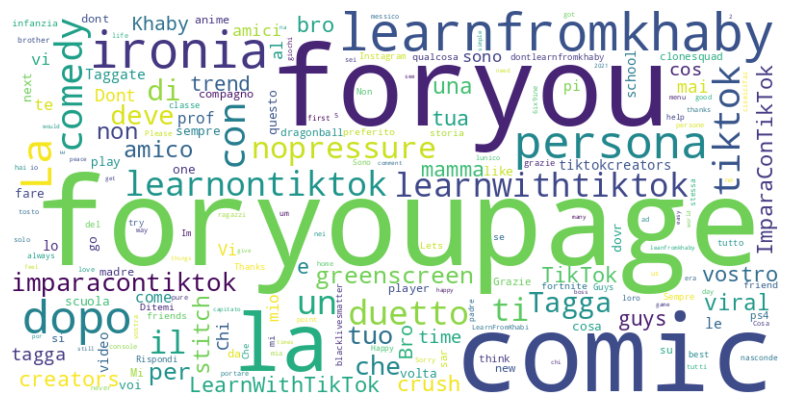

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [38]:
# Check the average caption length

df['caption_length'] = df['captions'].apply(len)
average_caption_length = df['caption_length'].mean()
print("Average caption length:", average_caption_length)


Average caption length: 68.26716141001856


In [39]:
# Check the most common used words in the hashtags

df['split_hashtags'] = df['hashtags'].str.split(', ')


In [40]:
word_list = [word for sublist in df['split_hashtags'] for word in sublist]


In [41]:
word_counts = Counter(word_list)

In [42]:
top_words = word_counts.most_common(10)
top_words

[('foryoupage', 602),
 ('foryou', 563),
 ('comic', 408),
 ('learnfromkhaby', 368),
 ('learnontiktok', 209),
 ('ironia', 187),
 ('learnwithtiktok', 108),
 ('comedy', 106),
 ('duetto', 81),
 ('imparacontiktok', 72)]

In [43]:
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

color_palette = ['#10b981', '#14b8a6', '#84cc16', '#7e22ce', '#758eb7',
                 '#f97316', '#0903a6', '#38184c', '#e11d48', '#dc2626']

colors = color_palette[:len(x_values)]

fig = go.Figure(data=go.Bar(x=x_values, y=y_values, marker_color=colors))
fig.update_layout(title='<b>Most Used Hashtags</b>',
                  xaxis_title='<b>Hashtags</b>',
                  yaxis_title='<b>Count</b>')

fig.show()


In [44]:
# What is the total of views over years
views_by_year = df.groupby('created_year')['views'].sum().reset_index()
views_by_year

,created_year,views
0,2020,86332680
1,2021,11394595695
2,2022,4702200000
3,2023,1681600000


In [45]:
# Plot the sum of views over years
fig = px.bar(views_by_year, x='created_year', y='views', color='created_year', title='<b>Total Views Over Years</b>')
fig.update_layout(xaxis_title='<b>Year</b>', yaxis_title='<b>Views</b>', xaxis_tickangle=-45)
fig.show()


In [46]:
df.dtypes

views                          int64
comments                       int64
shares                         int64
likes                          int64
duration                       int64
captions                      object
hashtags                      object
created_at            datetime64[ns]
created_day                   object
created_month                 object
created_year                  object
tokenized_captions            object
filtered_captions             object
caption_length                 int64
split_hashtags                object
dtype: object

In [47]:
average_views = df.groupby('duration')['views'].mean().reset_index()


In [48]:
fig = px.scatter(average_views, x='duration', y='views', color='duration', labels={'duration': 'Video Duration', 'views': 'Average Views'},
                 title='<b>What is the video duration that tends to attract more views?</b>')


fig.update_layout(xaxis_title='<b>Duration</b>', yaxis_title='<b>Average Views</b>')
fig.show()


In [49]:
df_exploded = df.explode('split_hashtags')
df_exploded


,views,comments,shares,likes,duration,captions,hashtags,created_at,created_day,created_month,created_year,tokenized_captions,filtered_captions,caption_length,split_hashtags
0,3000000,5006,1164,3504,23,I think Ill order online shopping for today le...,"learnfromkhaby, comic, commedy",2023-06-12,Monday,June,2023,"[I, think, Ill, order, online, shopping, for, ...","[think, Ill, order, online, shopping, today, l...",73,learnfromkhaby
0,3000000,5006,1164,3504,23,I think Ill order online shopping for today le...,"learnfromkhaby, comic, commedy",2023-06-12,Monday,June,2023,"[I, think, Ill, order, online, shopping, for, ...","[think, Ill, order, online, shopping, today, l...",73,comic
0,3000000,5006,1164,3504,23,I think Ill order online shopping for today le...,"learnfromkhaby, comic, commedy",2023-06-12,Monday,June,2023,"[I, think, Ill, order, online, shopping, for, ...","[think, Ill, order, online, shopping, today, l...",73,commedy
1,10800000,7425,1674,8491,31,I hope you will appreciate my little house It...,"learnfromkhaby, comic, commedy",2023-06-07,Wednesday,June,2023,"[I, hope, you, will, appreciate, my, little, h...","[hope, appreciate, little, house, learnfromkha...",87,learnfromkhaby
1,10800000,7425,1674,8491,31,I hope you will appreciate my little house It...,"learnfromkhaby, comic, commedy",2023-06-07,Wednesday,June,2023,"[I, hope, you, will, appreciate, my, little, h...","[hope, appreciate, little, house, learnfromkha...",87,comic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,9013,132,653,508,14,foryoupage comic,"learnfromkhaby, learnontiktok",2020-03-19,Thursday,March,2020,"[foryoupage, comic]","[foryoupage, comic]",16,learnontiktok
1076,1300000,3152,867,764,15,foryoupage comic,"learnfromkhaby, learnontiktok",2020-03-17,Tuesday,March,2020,"[foryoupage, comic]","[foryoupage, comic]",16,learnfromkhaby
1076,1300000,3152,867,764,15,foryoupage comic,"learnfromkhaby, learnontiktok",2020-03-17,Tuesday,March,2020,"[foryoupage, comic]","[foryoupage, comic]",16,learnontiktok
1077,2400000,896,134,3057,15,foryoupage comic,"learnfromkhaby, learnontiktok",2020-03-15,Sunday,March,2020,"[foryoupage, comic]","[foryoupage, comic]",16,learnfromkhaby


In [50]:
hashtag_views = df_exploded.groupby('split_hashtags')['views'].sum().reset_index()


In [51]:
hashtag_views_sorted = hashtag_views.sort_values('views', ascending=False)

# Select the top 10 most commonly used hashtags
top_10_hashtags = hashtag_views_sorted.head(10)


In [52]:
fig = px.bar(top_10_hashtags, x='split_hashtags', y='views', color='split_hashtags', 
             labels={'split_hashtags': 'Hashtag', 'views': 'Total Views'}, 
             title='<b>Which hashtags are most commonly used and do they have a correlation with views?</b>')
fig.update_layout(xaxis_title='<b>Hashtags</b>', yaxis_title='<b>Total Views</b>')

fig.show()


In [69]:
from textblob import TextBlob


In [70]:
# Perform sentiment analysis on the captions
df['sentiment'] = df['captions'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [76]:
df_yearly = df.groupby('created_year')['views'].sum().reset_index()


In [77]:
fig = px.line(df_yearly, x='created_year', y='views', title='<b>Number of Views Over the Years</b>')
fig.update_layout(xaxis_title='<b>Year</b>', yaxis_title='<b>Views</b>')
fig.show()


In [81]:
df_avg_likes = df.groupby('duration')['likes'].mean().reset_index()


In [83]:
fig = px.bar(df_avg_likes, x='duration', y='likes', color='likes', title='Average Likes by Duration')
fig.update_layout(xaxis_title='Duration', yaxis_title='Average Likes')
fig.show()


In [99]:
average_views = df.groupby('created_at')['views'].mean().reset_index()

sorted_duration = average_views.sort_values('views', ascending=False)

fig = px.line(df, x='created_at', y="views")
fig.show()
